# Multiclass classification
**Before this notebook, you should look at [Pandas_for_ML_data_management.ipynb](Pandas_for_ML_data_management.ipynb).**

## The machine learning iterative loop

<img src="../images/ML_loop.png"></img>

## The lithology prediction task

<img src="../images/machine_learning_primer.png"></img>

## Load the data

In [1]:
import pandas as pd

df = pd.read_csv('https://geocomp.s3.amazonaws.com/data/Panoma_training_data.csv')

In [3]:
df.head()

,Well Name,Formation,Depth,GR,DeltaPHI,PHIND,ILD,PE,Marine,RelPos,Facies,ILD_log10,Lithofacies,RHOB,Mineralogy,Lithology
0,SHRIMPLIN,A1 SH,2793.0,77.45,9.9,11.915,21.281390,4.6,0,1.000,3,1.328,f_siltstone,2393.499945,siliciclastic,siltstone
1,SHRIMPLIN,A1 SH,2793.5,78.26,14.2,12.565,20.989399,4.1,0,0.979,3,1.322,f_siltstone,2416.119814,siliciclastic,siltstone
2,SHRIMPLIN,A1 SH,2794.0,79.05,14.8,13.050,20.701413,3.6,0,0.957,3,1.316,f_siltstone,2404.576056,siliciclastic,siltstone
3,SHRIMPLIN,A1 SH,2794.5,86.10,13.9,13.115,20.417379,3.5,0,0.936,3,1.310,f_siltstone,2393.249071,siliciclastic,siltstone
4,SHRIMPLIN,A1 SH,2795.0,74.58,13.5,13.300,19.678863,3.4,0,0.915,3,1.294,f_siltstone,2382.602601,siliciclastic,siltstone


## Make `X` and `y`

### EXERCISE

**Make the `X` and `y` arrays we'll use for training.** `X` is going to be the columns `'GR','RHOB','PE','ILD_log10'` and `y` will be the `'Lithology'` column. Cast the data to NumPy arrays. <a title="Use ordinary dict-style indexing to get the columns out of the DataFrame. Use the values attribute of the columns to get the equivalent NumPy array."><b>Hover for HINT</b></a>

In [ ]:
# YOUR CODE HERE
X = 
y = 

In [ ]:
N, M = X.shape
assert N >= 3000
assert M == 4
assert y.size == N

In [4]:
features = ['GR','RHOB','PE','ILD_log10']

# You *can* leave these as Pandas objects, but I prefer NumPy arrays.
X = df[features].values
y = df['Lithology'].values

## Split the data

We must split the data into a training set, a validation set, and a test set. **This is a key step in the process.**

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.4, random_state=42)

We will also split this second set (with the underscores) into two parts: one to **validate** against while training the model and selecting hyperparameters (sometimes also called the **dev** set), and one to assess the likely real-world performance of the trained model.

Note that you should only predict on the **test** set once, at the end of model selection and tuning.

In [14]:
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size=0.5, random_state=42)

How do we feel about this? We've drawn all our records randomly from our data.

### The IID assumption

Our data records are not strictly independent and identically distributed. So splitting like this is not a great idea for these data. We should split by well instead.

[No-one is immune to this kind of error!](https://twitter.com/andrewyng/status/931026446717296640)

## MultiIndex

Waht if you have a multi-index?

In [7]:
dg = df.copy()

dg = dg.set_index(['Well Name', 'Depth'])

dg.head()

Formation     GR  DeltaPHI   PHIND        ILD   PE  Marine  \
Well Name Depth                                                               
SHRIMPLIN 2793.0     A1 SH  77.45       9.9  11.915  21.281390  4.6       0   
          2793.5     A1 SH  78.26      14.2  12.565  20.989399  4.1       0   
          2794.0     A1 SH  79.05      14.8  13.050  20.701413  3.6       0   
          2794.5     A1 SH  86.10      13.9  13.115  20.417379  3.5       0   
          2795.0     A1 SH  74.58      13.5  13.300  19.678863  3.4       0   

                  RelPos  Facies  ILD_log10  Lithofacies         RHOB  \
Well Name Depth                                                         
SHRIMPLIN 2793.0   1.000       3      1.328  f_siltstone  2393.499945   
          2793.5   0.979       3      1.322  f_siltstone  2416.119814   
          2794.0   0.957       3      1.316  f_siltstone  2404.576056   
          2794.5   0.936       3      1.310  f_siltstone  2393.249071   
          2795.0   0.915       3      1.294  f_siltstone  2382.602601   

                     Mineralogy  Lithology  
Well Name Depth                             
SHRIMPLIN 2793.0  siliciclastic  siltstone  
          2793.5  siliciclastic  siltstone  
          2794.0  siliciclastic  siltstone  
          2794.5  siliciclastic  siltstone  
          2795.0  siliciclastic  siltstone

In [16]:
pd.crosstab(dg['Lithology'], dg.index.get_level_values('Well Name'))

col_0,CHURCHMAN BIBLE,CROSS H CATTLE,LUKE G U,NEWBY,NOLAN,SHANKLE,SHRIMPLIN
Lithology,,,,,,,
dolomite,34,2,20,16,4,17,5
limestone,125,68,74,87,116,40,81
mudstone,43,53,37,86,75,26,81
sandstone,8,158,0,0,4,89,0
siltstone,106,184,246,178,186,205,241
wackestone,87,31,84,96,30,71,63


### EXERCISE

What is the distribution of lithologies across the wells? <a title="Check out pd.crosstab"><b>Hover for HINT</b></a>

In [ ]:
# YOUR CODE HERE


In [17]:
pd.crosstab(df['Lithology'], df['Well Name'])

Well Name,CHURCHMAN BIBLE,CROSS H CATTLE,LUKE G U,NEWBY,NOLAN,SHANKLE,SHRIMPLIN
Lithology,,,,,,,
dolomite,34,2,20,16,4,17,5
limestone,125,68,74,87,116,40,81
mudstone,43,53,37,86,75,26,81
sandstone,8,158,0,0,4,89,0
siltstone,106,184,246,178,186,205,241
wackestone,87,31,84,96,30,71,63


In [66]:
ct = pd.crosstab(df['Lithology'], df['Well Name'])

# Let's order this crosstab so that the validation and test wells are on the far right.
# Also, let's set the order of the lithologies in the table.
train_wells = ['NEWBY', 'CROSS H CATTLE', 'LUKE G U', 'NOLAN', 'SHRIMPLIN']
val_wells = ['CHURCHMAN BIBLE', 'SHANKLE']

lith_order = ['sandstone', 'siltstone', 'mudstone', 'wackestone', 'limestone', 'dolomite']

# Reindex the columns and the row.
ct = ct[train_wells + val_wells].reindex(lith_order)

# Normalize to percentages by row.
ct_norm = 100 * ct.div(ct.sum(axis=1), axis=0)

# Apply the bar style.
# ct_norm.style.bar(color=['#d65f5f', '#5fba7d'], vmax=0.5)

# Get really fancy: apply style from normalized ct to the un-normalized one.
def make_bar_style(x):
    c = f"#5fba7d {x}%" if x > 10 else f"#ca3f3f {x}%"  # Green if > 10% else red.
    return f"background: linear-gradient(270deg,{c}, transparent {x}%); width: 10em"    

ct.style.apply(lambda x: ct_norm.applymap(make_bar_style), axis=None)

Well Name,NEWBY,CROSS H CATTLE,LUKE G U,NOLAN,SHRIMPLIN,CHURCHMAN BIBLE,SHANKLE
Lithology,,,,,,,
sandstone,0,158,0,4,0,8,89
siltstone,178,184,246,186,241,106,205
mudstone,86,53,37,75,81,43,26
wackestone,96,31,84,30,63,87,71
limestone,87,68,74,116,81,125,40
dolomite,16,2,20,4,5,34,17


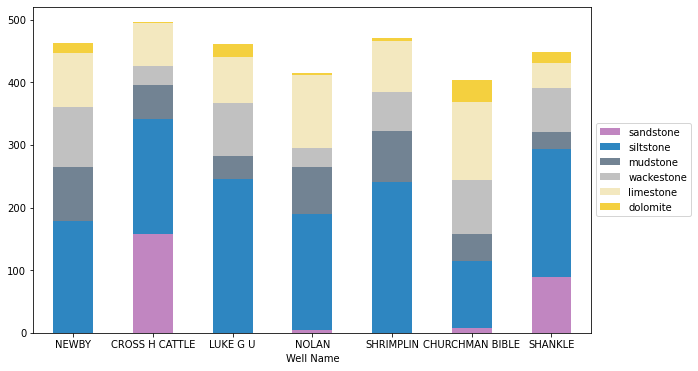

In [67]:
from matplotlib.colors import ListedColormap

color_codes = {'dolomite': '#C186C1',
              'limestone': '#2E86C1',
              'wackestone': '#728393',
              'mudstone': '#C1C1C1',
              'siltstone': '#F3E8BF',
              'sandstone': '#F4D03F'}

cmap_facies = ListedColormap(color_codes.values(), 'indexed')
ax = ct.T.plot(kind='bar', stacked=True, rot=0, figsize=(10,6), cmap=cmap_facies)
_ = ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

### Let's split!

In [9]:
df['Well Name'].unique()

array(['SHRIMPLIN', 'SHANKLE', 'LUKE G U', 'CROSS H CATTLE', 'NOLAN',
       'NEWBY', 'CHURCHMAN BIBLE'], dtype=object)

In [10]:
train_wells = ['NEWBY', 'CROSS H CATTLE', 'LUKE G U', 'NOLAN', 'SHRIMPLIN']

X_train = df.loc[df['Well Name'].isin(train_wells), features].values
y_train = df.loc[df['Well Name'].isin(train_wells), 'Lithology'].values

# And we might need this later...
wells_train = df.loc[df['Well Name'].isin(train_wells), 'Well Name'].values

In [11]:
X_train.shape, y_train.shape

((2311, 4), (2311,))

In [12]:
val_wells = ['CHURCHMAN BIBLE', 'SHANKLE']

X_ = df.loc[df['Well Name'].isin(val_wells), features].values
y_ = df.loc[df['Well Name'].isin(val_wells), 'Lithology'].values

In [13]:
X_.shape, y_.shape

((853, 4), (853,))

In [14]:
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size=0.5, random_state=42)

Another option is k-fold cross-validation, or LOGO (leave one group out) cross-validation. But if you have enough training data, it's better to stick to holdout sets.

## Sanity check the distributions

Let's visualize the distributions over the features, for each of the datasets. We'd like the distributions to match, i.e. training matches val and test.

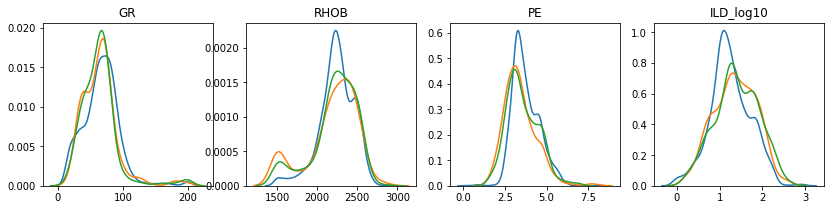

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=4, figsize=(14,3))

for ax, feature, *datasets in zip(axs, features, X_train.T, X_val.T, X_test.T):
    for dataset in datasets:
        sns.kdeplot(dataset, ax=ax)
    ax.set_ylabel(None)
    ax.set_title(feature)

## Standardizing the data

Some methods don't care about the scale of the features. For example, decision trees and random forests treat each feature independently.

However, most methods &mdash; for example those relying on distance (e.g. KNN), or on linear combinations (e.g. linear regression), or on squeezing functions (e.g. neural nets) &mdash; require the data to be normalized or standardized:

- **Normalization**: scaling to a range of [0, 1] or [-1, +1] for example. As a rule of thumb, you might do this for uniformly distributed data.
- **Standardization**: scaling to a zero mean and unit variance (also known as Z-score). Do this for normally (Gaussian) distributed data.

It's likely a good idea to scale it no matter which method you try.

`scikit-learn` has lots of scalers. The `StandardScaler` removes the mean and scales the data to unit variance.

Let's take a quick look at the data before scaling:

In [1]:
import matplotlib.pyplot as plt

plt.scatter(X_train[:,0], X_train[:,1])
plt.show()

NameError: name 'X_train' is not defined

Notice that interpreting this as a Euclidean space — which is how a lot of machine learning models are going to look at it — seems to distort the data, purely because of the (potentially arbitrary, as here) difference in scales across the features. 

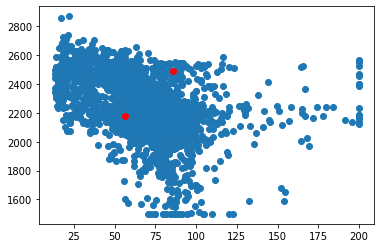

In [17]:
x0, x1 = X[20, :2], X[2490, :2]

plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(*x0.T, c='r')
plt.scatter(*x1.T, c='r')
# plt.axis('equal')  # <-- Now uncomment this line to see how Euclid sees it!
plt.show()

We fit a scaler to the training data, then transform all the datasets, with a pattern that will become very familiar:

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)

Note that it is possible to fit and transform some models in one step:

    X = scaler.fit_transform(X)
    
You could even instantiate the model instance in the same statement, but this has the major disadvantage of not getting access to the model later.

Now let's plot the data using equal axes:

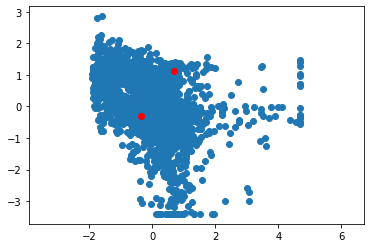

In [19]:
s0 = scaler.transform(X)[20, :2]
s1 = scaler.transform(X)[2490, :2]

plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(*s0.T, c='r')
plt.scatter(*s1.T, c='r')
plt.axis('equal')
plt.show()

This is better.

Let's scale the validation data too:

In [20]:
X_val = scaler.transform(X_val)

# We won't transform X_test for now.

We can also reconfirm that our training and validation sets have roughly the same distributions:

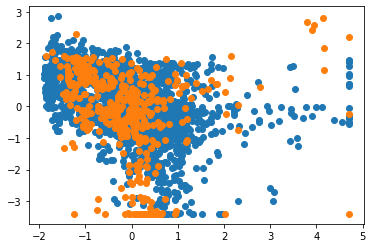

In [21]:
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(X_val[:,0], X_val[:,1])

Since any future application of the model will need this scaler, you may need to share it with others who want to apply the model. There are two options for this:

- Share the scaler as a separate 'model'.
- Make an `sklearn` pipeline containing both the scaler and the classifier.

We'll do both of these eventually. For now, we'll just keep this scaler in memory and move on.

**NOTE**

Data normalization doesn't magically fix problems with the data. If you're lumping a bunch of well data together and the GR, say, is calibrated differently in each well, or the RHOB units vary, then the scaled data will also have this problem. So you still need to QC your data to ensure it's internally consistent.

### Should you scale the target?

There is usually no advantage to scaling the target, and it does make model evaluation a bit more fiddly, so we generally don't do it.

The exception is for some neural network approaches. Very large magnitudes may result in 'exploding gradients', which in turn may result in 'saturation' (for some activation functions), or in very large updates to the parameters. Either way, the network will struggle to learn. So in these cases, we will sometimes scale a regression target for a neural network.

---

## A simple model: _k_-NN

In [22]:
import sklearn

print(sklearn.__version__)

# Make sure we can see all of the model details.
sklearn.set_config(print_changed_only=False)

0.24.2


A fairly naive, **non-parametric** method for classifying data is the _k-nearest neighbours_ algorithm. 'Non-parametric' means that, strictly speaking, it's not quite machine learning: no parameters are being learned during training. The algorithm simply remembers all the data and uses it to do spatial queries for new data points.

The label of the object in question is determined by the neighbouring data points in the feature space used. Its most important parameter, *k*, called `n_neighbors` in the `sklearn` library, is the number of neighbours you include to make a prediction.

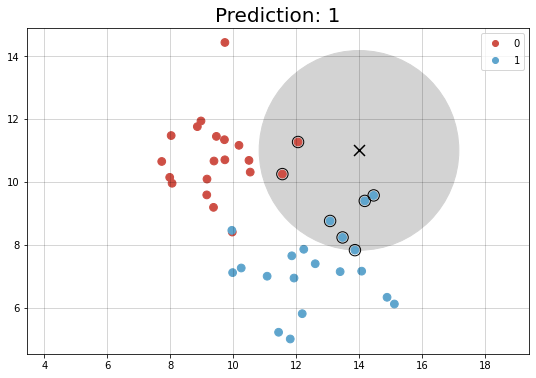

In [49]:
from utils import plot_knn

plot_knn()

Now we're ready to do some machine learning. First we import, then instantiate, the classifier:

In [23]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()

### `fit` (train)

The next block is all you need to train a classifier model!

In [ ]:
clf.fit(X_train, y_train)

### `predict`

In [31]:
y_pred = clf.predict(X_val)

In [ ]:
y_pred == y_val

# Then: (y_pred == y_val) / y_pred.size

In [ ]:
for pair in zip(y_pred, y_val):
    print(pair)

In [ ]:
plt.figure(figsize=(15, 2))
plt.plot(y_val[:100], 'o-')
plt.plot(y_pred[:100], 'o-')
plt.show()

Another approach might involve plotting, and often we'd like integers anyway. 

We could use the `LabelEncoder` in sklearn, but I want to control the order, so let's do this:

In [32]:
import numpy as np

def label_encode(array, classes):
    return np.array(list(map(list(classes).index, array)))

classes = {
    'sandstone': '#F4D03F',
    'siltstone': '#F3E8BF' ,
    'mudstone': '#C1C1C1',
    'wackestone': '#728393',
    'limestone': '#2E86C1',
    'dolomite': '#C186C1'
}

print(label_encode(classes, classes.keys()))

y_val_int = label_encode(y_val, classes.keys())
y_pred_int = label_encode(y_pred, classes.keys())

[0 1 2 3 4 5]


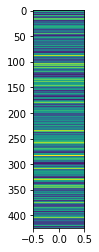

In [33]:
plt.imshow(y_val_int.reshape(-1, 1), aspect=0.01)

/Users/matt/opt/miniconda3/envs/geoml/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().


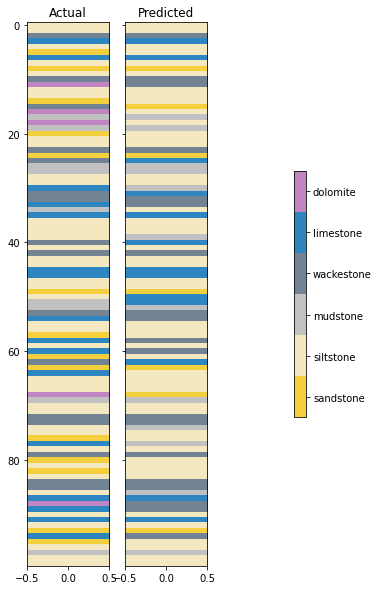

In [34]:
from matplotlib.colors import ListedColormap

fig, axs = plt.subplots(ncols=3, figsize=(5, 10), sharey=True)

cmap_facies = ListedColormap(classes.values(), 'indexed')

ax = axs[0]
im = ax.imshow(y_val_int[:100].reshape(-1, 1), aspect='auto', cmap=cmap_facies, vmin=-0.5, vmax=5.5)
ax.set_title('Actual')

ax = axs[1]
im = ax.imshow(y_pred_int[:100].reshape(-1, 1), aspect='auto', cmap=cmap_facies, vmin=-0.5, vmax=5.5)
ax.set_title('Predicted')

ax = axs[2]
ax.axis('off')
cbar = fig.colorbar(im, ticks=[0, 1, 2, 3, 4, 5])
cbar.ax.set_yticklabels(classes.keys())

plt.show()

There may not be any no dolomite in this *part* of the prediction!

In [ ]:
np.unique(y_pred)

...or any of it! (Your mileage may vary: our datasets and random splits may differ here.)

### How did we do?

Looking at the results is great, but we need to get quantitative if we want to make sure that the model we trained is _good_ and produces reasonable results. 

Let's make sure we do well on the **training** data:

In [35]:
score = clf.score(X_train, y_train)
print(f"The training accuracy is {score*100:.1f}%")

The training accuracy is 88.2%


The most basic *fair* test is to look at how many good predictions we would make if we predict on our **validation** data.

In [36]:
score = clf.score(X_val, y_val)
print(f"The validation accuracy is {score*100:.1f}%")

The validation accuracy is 60.7%


This is the same as explicitly calling `sklearn.metrics.accuracy_score()` on the validation labels and the prediction from the validation data.

In [24]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_val, y_pred))

NameError: name 'y_pred' is not defined

## Accuracy is (usually) not enough

The _accuracy_ is just one of the _metrics_ we can use to check the quality of the predictions. There are a large number of different metrics and depending on your data and problem you may need to find the one that adjusts better to your needs.

In a binary classification with balanced classes, the accuracy score is useful. But... in general accuracy can be misleading, especially in datasets with unbalanced classes. A more robust metric is the `F1` metric. It combines the `precision` score and `recall` for each class:

$$ \mathrm{F1} = \frac{2}{\frac{1}{\mathrm{precision}}+ \frac{1}{\mathrm{recall}}} $$

Scikit-learn gives a nice summary of these three metrics using `classification_report`.

In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_val, clf.predict(X_val), digits=3, ))

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

#### What on earth is macro average?

From [this nice answer](https://datascience.stackexchange.com/a/24051/70391) on SO:

>  A macro-average will compute the metric independently for each class and then take the average (hence treating all classes equally), whereas a micro-average [`sklearn` calls it the weighted average] will aggregate the contributions of all classes to compute the average metric. In a multi-class classification setup, micro-average [weighted average] is preferable if you suspect there might be class imbalance.

Since we almost always have imbalanced classes, we should usually prefer the weighted average.

## Dealing with class imbalance

"Class imbalance" means that we have more of some labels than others. This does lead to problems in both training and evaluation.

- Collect more data, if it's an option.
- Choose correct evaluation metrics (some attempt to handle imbalance, eg F1 vs accuracy).
- Choose models that handle imbalance well, e.g. tree-based models. (Some implementations, like XGBoost, try to implicitly handle imbalance.)
- When splitting into holdout or cross-validation datasets, use _stratified_ variants. Note that this is the default behaviour in Scikit-Learn's cross-validation functions, but _not_ in `train_test_split()`.
- If the problem is an over-abundant class, split that class into groups, and mix with the rare class (which you repeat in each group).
- If the problem is an over-abundant class, under-sample the abundant class(es) -- but this means losing the learning effect from those samples.
- If the problem is an over-abundant class, cluster the abundant class into _r_ clusters (where _r_ is the number of instances in the rare class). In other words, you're sort of undersampling without losing the information.
- If the problem is an _under_-abundant class, over-sample that rare class, e.g. by repeating or fuzzing (adding some random noise in each dimension).
- Simulate synthetic samples for the rare class (e.g. with SMOTE).
- Use a custom cost function, or a cost matrix, that penalizes errors on the rare class(es).

I found this library, which could be useful if you're considering over- or under-sampling as a strategy: https://github.com/scikit-learn-contrib/imbalanced-learn

## Confusion matrix

The [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) is another option: which classes are being confused with which?  Scikit-learn has a function for that!

In [41]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_val, y_pred)

array([[  0,   8,   0,   4,  10,   9],
       [  0,  30,  11,   1,   4,  38],
       [  0,   2,  24,   0,   5,   0],
       [  0,   0,   0,  11,  37,   2],
       [  0,   1,  12,   1, 141,   1],
       [  0,  13,   3,   2,   3,  52]])

But as you can see, it's not very clear... What does each row/column represent? There's another function that's a bit more informative:

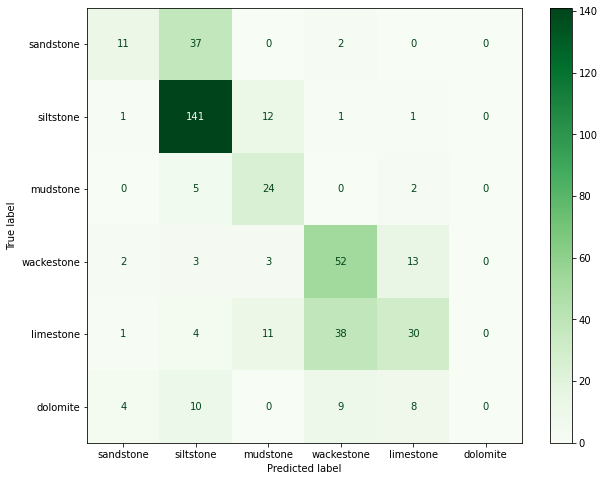

In [42]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(10, 8))
plot_confusion_matrix(clf, X_val, y_val, labels=list(classes.keys()), cmap=plt.cm.Greens, ax=ax)
plt.show()

I like to normalize the values across the rows with `normalize='true'`, but then you only get proportions for the labels. To maintain the support numbers as above:

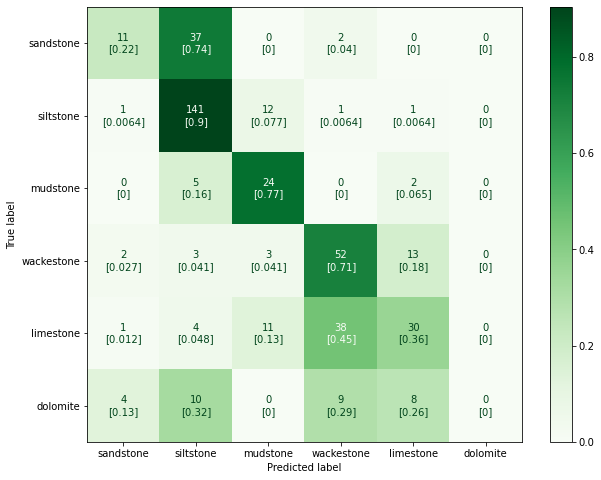

In [45]:
labels = list(classes.keys())
cm = confusion_matrix(y_val, y_pred, labels=labels)

fig, ax = plt.subplots(figsize=(10, 8))
cmp = plot_confusion_matrix(clf, X_val, y_val, labels=labels, normalize='true', cmap=plt.cm.Greens, ax=ax)
for n, p in zip(cm.ravel(), cmp.text_.ravel()):
    p.set_text(f'{n}\n[{p.get_text()}]')
plt.show()

### Precision-recall, sensitivity-specificity, etc.

**Accuracy** is simply the number of correct predictions divided by the total number of predictions. The number and types of error don't come into it. There's one number for the entire prediction. And it omits a big part of the story.

There are various ways to capture the kinds of errors the classifier makes. Confusingly, they all have synonyms too (shown here)...

- **Precision, or positive predictive value**: of the instances predicted as class Ⓐ, what proportion were correct?
- **Recall, sensitivity, hit rate, or true positive rate**: what proportion of all Ⓐ instances were correctly predicted as Ⓐ?
- **Specificity, selectivity, or true negative rate ( = 1 - false positive rate)**: what proportion of all non-Ⓐ instances were correctly predicted as non-Ⓐ?

We tend to consider either precision and recall, or sensitivity (the same as recall) and specificity. There's a trade-off between the two: better recall involves giving up some precision and vice-versa.

The ROC curve tries to capture this trade-off. Look for [the binary classification notebook](Binary_classification.ipynb).

### Exercise

- what is the **accuracy** of this classifier?
- what is the **precision** for dolomite? 
- what is the **recall** for sand? 

Note that there are 31 dolomite points and 55 sandstone points in the validation data.

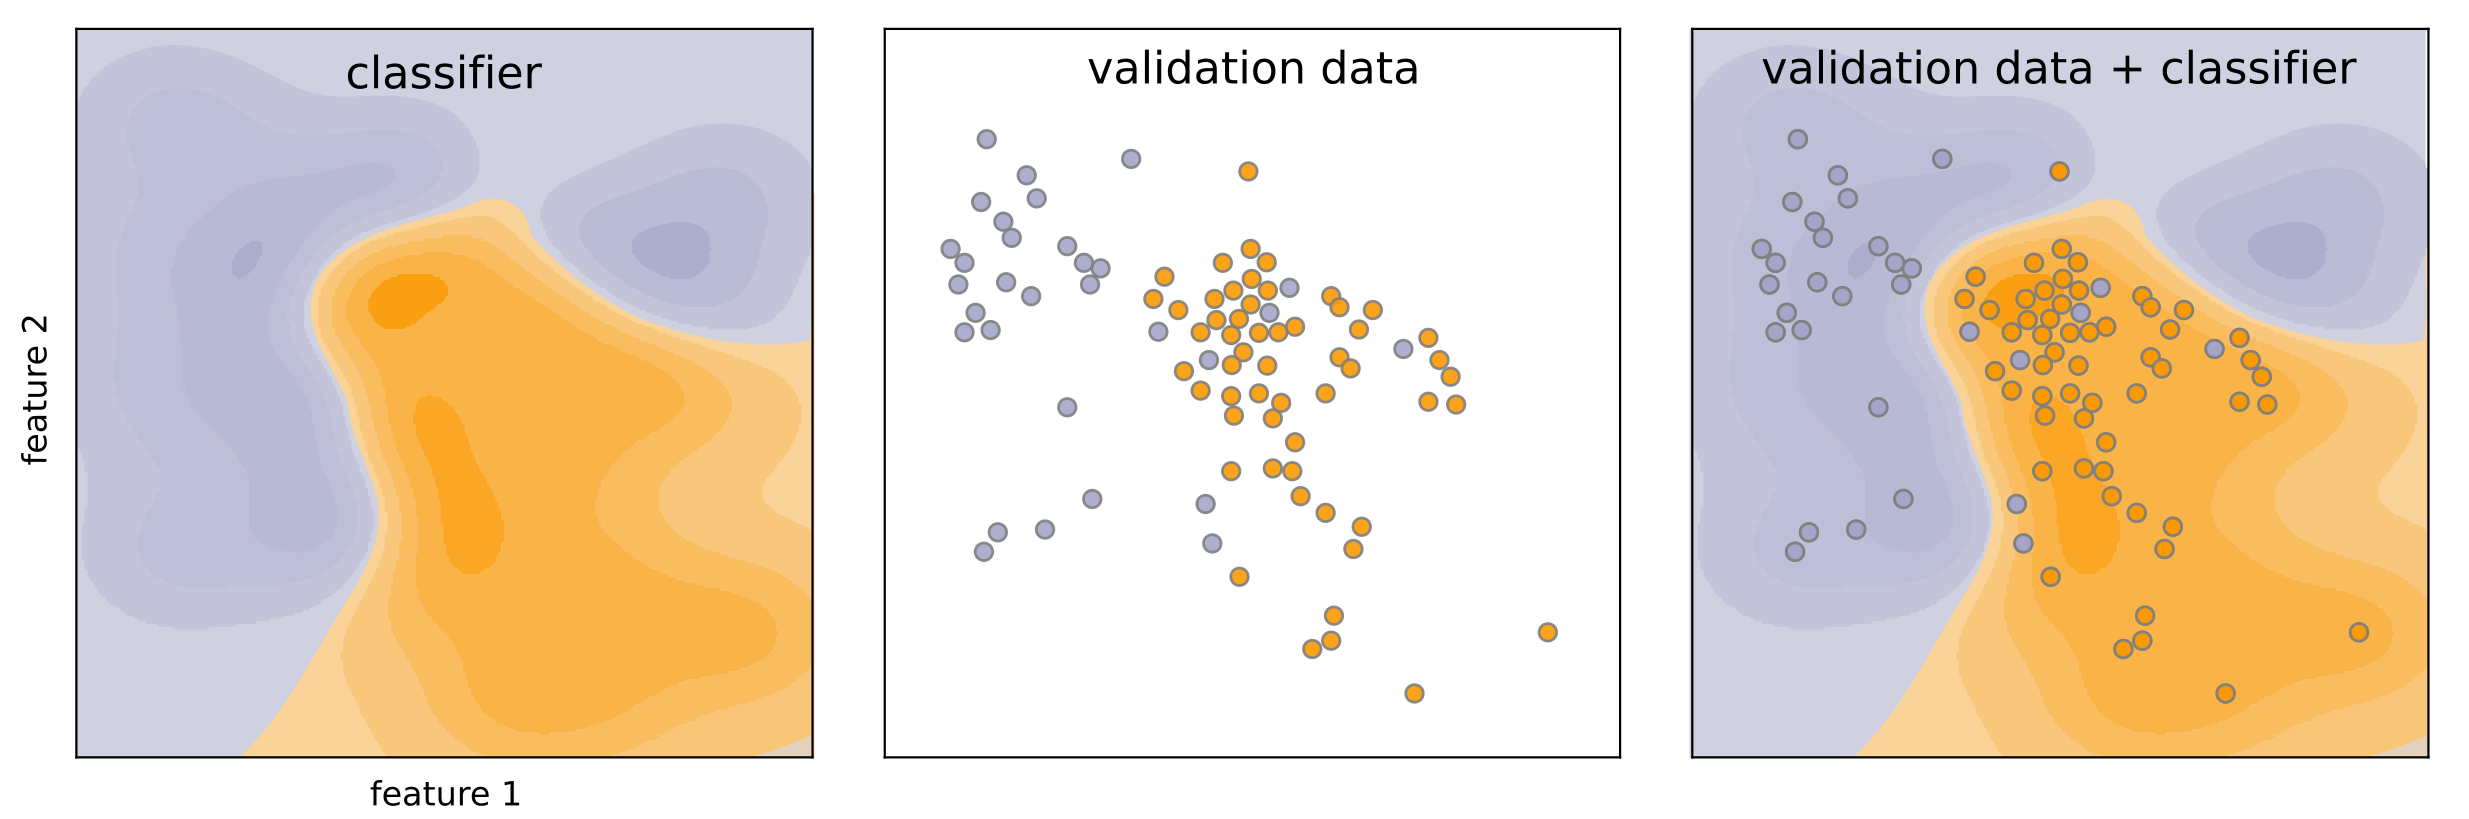

In [2]:
from IPython.display import Image

Image('../images/2d_2class_classifier.png') 

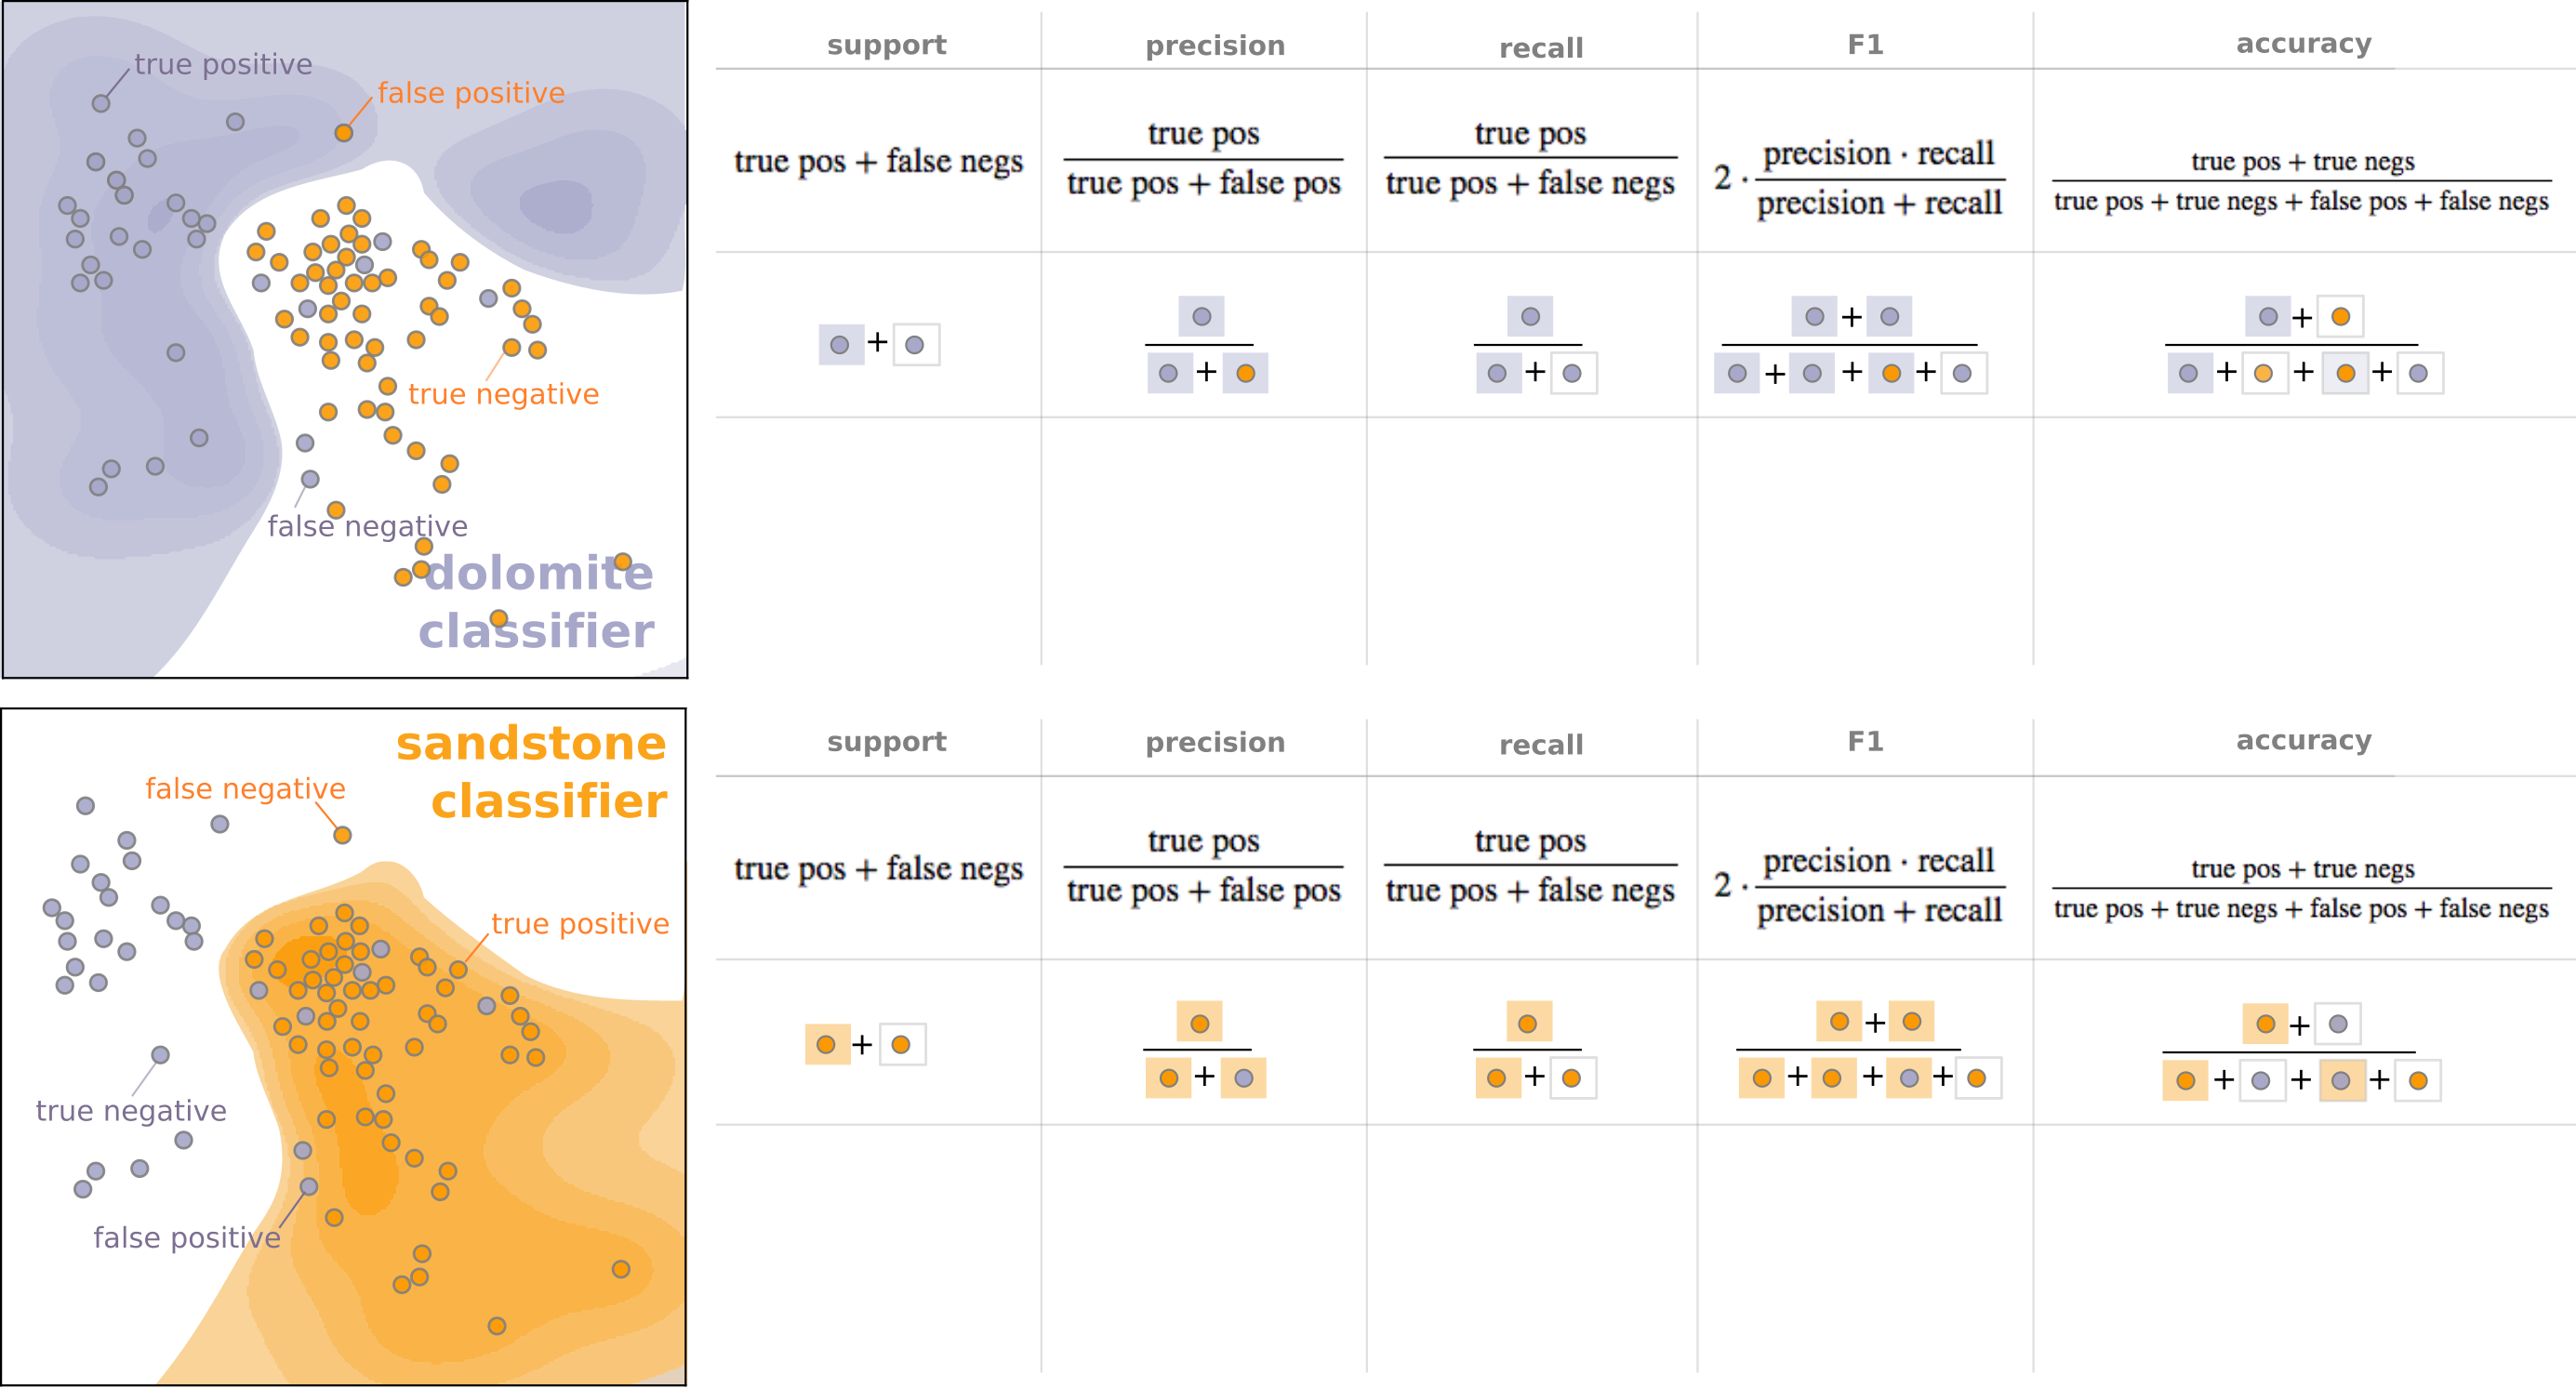

In [5]:
Image('../images/dolomite_and_sandstone_worksheet.png') 

In [18]:
def report(tp, fp, tn, fn):
    support = tp + fn
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * (precision * recall) / (precision + recall)
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    
    string = f"""    Support:   {support}
    Precision: {precision:.2f}
    Recall:    {recall:.2f}
    F1:        {f1:.2f}
    Accuracy:  {accuracy:.2f}
    """

    return string

In [19]:
# dolomite
tp, fp = 24, 1
tn, fn = 54, 7

print(report(tp, fp, tn, fn))

    Support:   31
    Precision: 0.96
    Recall:    0.77
    F1:        0.86
    Accuracy:  0.91
    


In [20]:
# sandstone
tp, fp = 54, 7
tn, fn = 24, 1

print(report(tp, fp, tn, fn))

    Support:   55
    Precision: 0.89
    Recall:    0.98
    F1:        0.93
    Accuracy:  0.91
    


In [ ]:
from sklearn.metrics import classification_report

val =         31*['dolomite']            +         55*['sandstone']
pred = 24*['dolomite'] + 7*['sandstone'] + 54*['sandstone'] + 1*['dolomite']

print(classification_report(val, pred, digits=2))

## Subtlety in the score

Let's look at two types of error. 

Both of these are errors in the eyes of the ML algorithm, but not necessarily in the eyes of the geologist.

First: predicting 8 (maybe coarse sand) instead of 7 (fine sand) should not be as bad as predicting 2 (say, basalt) instead of 7. How could we fix this?

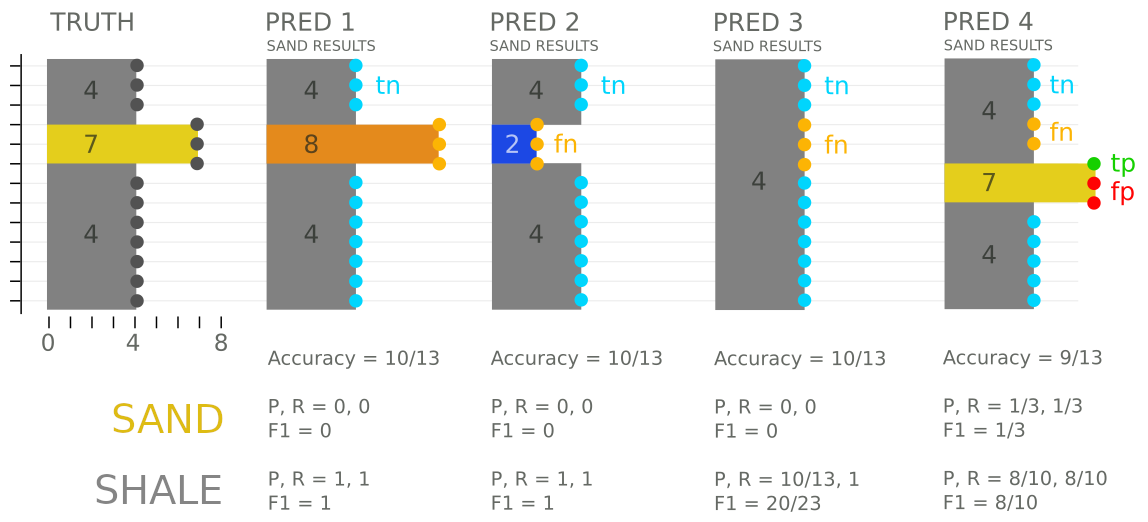

In [5]:
Image("../images/classification_errors.png")

## The baseline: a dummy classifier

The dummy classifier tries to answer the question, "How well can I do with zero intelligence?". In other words, given the relative proportions of facies, what would you expect from random weighted guesses?

In [26]:
from sklearn.dummy import DummyClassifier

clf = DummyClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

    dolomite       0.00      0.00      0.00        30
   limestone       0.00      0.00      0.00        81
    mudstone       0.00      0.00      0.00        31
   sandstone       0.00      0.00      0.00        50
   siltstone       0.38      1.00      0.55       160
  wackestone       0.00      0.00      0.00        74

    accuracy                           0.38       426
   macro avg       0.06      0.17      0.09       426
weighted avg       0.14      0.38      0.21       426



/Users/matt/opt/miniconda3/envs/geoml/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matt/opt/miniconda3/envs/geoml/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matt/opt/miniconda3/envs/geoml/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

In essence, if I can't beat this, then my model is definitely not useful.

Another measure of 'useful' is whether the classifier can beat a human (but don't forget that these labels were generated by a human!).

## Improving the performance

Depending on you requirements, this results might be good enough to deploy this model and use it in production but it is usually not the best model you can get. Each method has a set of controls or arguments, known as _hyperparameters_, that can be tweaked to tune the training.

Note that we don't call these settings 'parameters' because that word is reserved for the learnable parameters, weights, or coefficients in the model (e.g. $\mathbf{w}$ and $b$ in $\hat{y} = \mathbf{w}\mathbf{x} + b$).

For the `KNeighborsClassifier` there are a few of these hyperparameters:

In [ ]:
KNeighborsClassifier()

For this particular method, the most important hyperparameter to adjust is `n_neighbors` (it's the `k` in the `KNeighborsClassifier`). Unfortunately, there's no rule that tells you what's the optimal value of `k`. To overcome this we can train many models with different values of `k` and compare the results of classifications applied to the _Validation_ data.

In [27]:
import numpy as np

k = np.arange(1, 60, 2)  # No need to test all values.

Loop over each value in `k` and store the F1 score for each attempt:

In [28]:
from sklearn.metrics import f1_score

vals, trns = [], []

for ki in k:
    clf = KNeighborsClassifier(n_neighbors=ki)
    clf.fit(X_train, y_train)
    
    y_ptrn = clf.predict(X_train)
    trns.append(f1_score(y_train, y_ptrn, average='weighted'))

    y_pred = clf.predict(X_val)
    vals.append(f1_score(y_val, y_pred, average='weighted'))

What value of `k` gives us the best result?

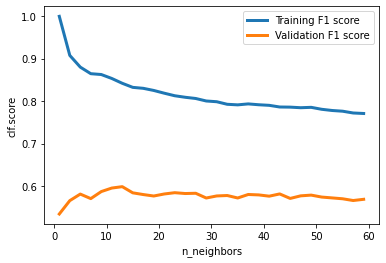

In [29]:
plt.plot(k, trns, lw=3.0, label="Training F1 score")
plt.plot(k, vals, lw=3.0, label="Validation F1 score")
_ = plt.xlabel('n_neighbors')
_ = plt.ylabel('clf.score')
_ = plt.legend()

### Exercise

- Figure out `k_best`, the value of `k` corresponding to the best score in `vals`. <b><span title="You will find np.argmax() useful. It gives the position of the maximum value in an array. Try it on array([2,4,6,10,6,4,2]).">Hover for hint.</span></b>
- Create a new `KNeighborsClassifier` classifier where you specify the optimal number of neighbours.
- Write a new classification report for the new classifier.

In [32]:
# YOUR CODE HERE



In [42]:
k_best = k[np.argmax(vals)]

print(f"k_best = {k_best}\n")

clf = KNeighborsClassifier(k_best)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)

print(classification_report(y_val, y_pred, digits=3))

k_best = 13

              precision    recall  f1-score   support

    dolomite      1.000     0.067     0.125        30
   limestone      0.689     0.383     0.492        81
    mudstone      0.622     0.903     0.737        31
   sandstone      0.500     0.160     0.242        50
   siltstone      0.697     0.950     0.804       160
  wackestone      0.560     0.757     0.644        74

    accuracy                          0.650       426
   macro avg      0.678     0.537     0.507       426
weighted avg      0.665     0.650     0.598       426



----

## Support vector machine

The support vector machine is one of the classic linear classifiers. A linear SVM is a **parametric** model, meaning that it learns a relatively small number of model parameters during training. [See this link for more on this jargon.](https://sebastianraschka.com/faq/docs/parametric_vs_nonparametric.html)

SVMs &mdash; linear and kernel-based &mdash; do well in high-dimensional data, but not sparse data. They also need all the features to be at the same scale, so they work well for things like pixel intensities.

### Exercise

Implement a support vector classifier and checks its effectiveness on the validation data, e.g. by printing the classification report.

In [ ]:
from sklearn.svm import SVC

# YOUR CODE HERE


In [43]:
from sklearn.svm import SVC

clf = SVC(probability=True)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)

print(classification_report(y_val, y_pred, digits=3))

              precision    recall  f1-score   support

    dolomite      1.000     0.100     0.182        30
   limestone      0.629     0.481     0.545        81
    mudstone      0.778     0.903     0.836        31
   sandstone      0.588     0.200     0.299        50
   siltstone      0.738     0.950     0.831       160
  wackestone      0.520     0.716     0.602        74

    accuracy                          0.669       426
   macro avg      0.709     0.558     0.549       426
weighted avg      0.683     0.669     0.629       426



Many, but not all, models provide probabilistic classifications. When you call `predict()`, you're getting the `argmax` of this array†.

---

† Sort of... the probabilities do not necessarily exactly match the predictions made by the SVM, which depend on the distance to the decision hypersurface in a high-dimenional space. The process that estimates probability, Platt scaling, is not totally predictable; [see the documentation.](https://scikit-learn.org/stable/modules/svm.html#scores-and-probabilities)

In [44]:
np.set_printoptions(precision=4, suppress=True)

clf.predict_proba(X_val)

array([[0.0014, 0.0225, 0.0629, 0.0215, 0.8831, 0.0086],
       [0.0107, 0.0379, 0.067 , 0.0484, 0.8216, 0.0144],
       [0.0057, 0.0254, 0.0371, 0.0541, 0.8568, 0.0208],
       ...,
       [0.0042, 0.0253, 0.0465, 0.0327, 0.8731, 0.0183],
       [0.0013, 0.0027, 0.9817, 0.0009, 0.0112, 0.0022],
       [0.0022, 0.0277, 0.7345, 0.0044, 0.2235, 0.0076]])

Note that by default, the SVM will use regularization (unlike the usual alpha, the C hyperparameter is **inversely** proportional to the amount of regularization, so use low C for smoother models), and kernel transformations (fitting non-linearly separable data).

Let's see how the training and validation scores vary with C:

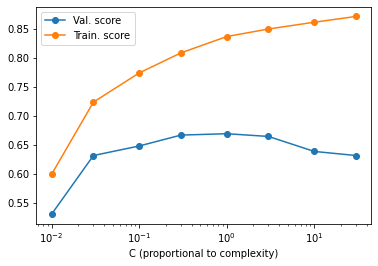

In [45]:
Cs = [0.01, 0.03, 0.1, 0.3, 1.0, 3.0, 10, 30]
trains, vals = [], []

for C in Cs:
    clf = SVC(C=C).fit(X_train, y_train)
    trains.append(clf.score(X_train, y_train))
    vals.append(clf.score(X_val, y_val))

plt.plot(Cs, vals, 'o-', label="Val. score")
plt.plot(Cs, trains, 'o-', label="Train. score")
plt.xlabel('C (proportional to complexity)')
plt.xscale('log')
_ = plt.legend()

Looks like the range 0.3-ish is where we want to look.

## ROC-AUC as a model selection tool

The **Area Under the Curve** (AUC) of the [**Receiver Operating Characteristic** (ROC)](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) is another way to compare models (or versions of the model with different hyperparameter settings).

[Here's a great video about the AUC-ROC method.](https://www.youtube.com/watch?v=4jRBRDbJemM)

So let's take a look at the area under the ROC curve to look for the best value of `C`:

In [ ]:
from sklearn.metrics import roc_auc_score

aucs = []

for C in Cs:
    clf = SVC(C=C, probability=True).fit(X_train, y_train)
    y_prob = clf.predict_proba(X_val)
    auc = roc_auc_score(y_val, y_prob, multi_class='ovo')
    aucs.append(auc)

plt.plot(Cs, aucs, 'o-')
plt.ylabel('ROC-AUC (not score!)')
plt.xlabel('C (proportional to complexity)')
plt.xscale('log')

This supports the idea that anything in the range 0.1 to 0.3 is a decent choice.

In [46]:
clf = SVC(C=0.5)  # Pick a good compromise.

clf.fit(X_train, y_train)

print(classification_report(y_val, clf.predict(X_val), digits=3))

              precision    recall  f1-score   support

    dolomite      1.000     0.033     0.065        30
   limestone      0.636     0.519     0.571        81
    mudstone      0.778     0.903     0.836        31
   sandstone      0.529     0.180     0.269        50
   siltstone      0.724     0.950     0.822       160
  wackestone      0.583     0.757     0.659        74

    accuracy                          0.676       426
   macro avg      0.708     0.557     0.537       426
weighted avg      0.683     0.676     0.629       426



----
## Decision tree

Decision trees are another non-parametric model type (like KNN).

They have the advantage of being more explainable than a lot of other model types. They tend to do quite well with little tuning, however they are prone to overfitting.

### Exercise

Implement a decision tree.

In [ ]:
# YOUR CODE HERE



In [47]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)

print(classification_report(y_val, y_pred, digits=3))

              precision    recall  f1-score   support

    dolomite      1.000     0.100     0.182        30
   limestone      0.810     0.580     0.676        81
    mudstone      0.455     0.645     0.533        31
   sandstone      0.050     0.020     0.029        50
   siltstone      0.603     0.931     0.732       160
  wackestone      0.481     0.351     0.406        74

    accuracy                          0.577       426
   macro avg      0.567     0.438     0.426       426
weighted avg      0.574     0.577     0.529       426



Being able to see feature importances is a nice feature of decision trees:

In [ ]:
clf.feature_importances_

In [ ]:
features

...and so is being able to see the tree.

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))

_ = plot_tree(clf,
              filled=True,
              feature_names=features,
              class_names=clf.classes_,
              fontsize=8,
             )

## Random forests

Decision trees are prone to overtraining. An ensemble of decision trees can help avoid this... and makes for a highly effective classifier.

### Exercise

Implement a Random Forest.

In [ ]:
# YOUR CODE HERE



In [48]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=4).fit(X_train, y_train)

y_pred = clf.predict(X_val)

print(classification_report(y_val, y_pred, digits=3))

              precision    recall  f1-score   support

    dolomite      0.000     0.000     0.000        30
   limestone      0.707     0.506     0.590        81
    mudstone      0.741     0.645     0.690        31
   sandstone      0.100     0.020     0.033        50
   siltstone      0.668     0.944     0.782       160
  wackestone      0.581     0.824     0.682        74

    accuracy                          0.643       426
   macro avg      0.466     0.490     0.463       426
weighted avg      0.552     0.643     0.579       426



/Users/matt/opt/miniconda3/envs/geoml/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matt/opt/miniconda3/envs/geoml/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matt/opt/miniconda3/envs/geoml/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

---

## Choosing the right estimator

Often the hardest part of solving a machine learning problem can be finding the right estimator for the job.

This is a good place to start ([here](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) is a clickable version):

<img src="https://scikit-learn.org/stable/_static/ml_map.png"></img>

---

Different estimators are better suited for different types of data and different problems. For a classifier comparison (below) check the source code [here](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_classifier_comparison_001.png"></img>

### [Check out this paper with a comparison of many classifiers](https://arxiv.org/abs/1708.05070)

Let's try visualizing the decision boundary for our problem.

We'll need to reduce it to 2 features using PCA. Just like most other transformations in `scikit-learn`, we implement PCA by training a model:

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(X_train)

X_trn_2 = pca.transform(X_train)
X_val_2 = pca.transform(X_val)

NameError: name 'X_train' is not defined

Now train with these new features.

In [ ]:
X_trn_2 = X_trn_2[(y_train=='sandstone')|(y_train=='mudstone')|(y_train=='limestone')]
X_val_2 = X_val_2[(y_val=='sandstone')|(y_val=='mudstone')|(y_val=='limestone')]

In [ ]:
y_trn_2 = y_train[(y_train=='sandstone')|(y_train=='mudstone')|(y_train=='limestone')]
y_val_2 = y_val[(y_val=='sandstone')|(y_val=='mudstone')|(y_val=='limestone')]

In [ ]:
clf = RandomForestClassifier(n_estimators=100).fit(X_trn_2, y_trn_2)
y_pred = clf.predict(X_val_2)

Now we make a prediction at every point on a regular grid:

In [ ]:
h = 0.02  # Step size in the mesh.
extent = [-6, 6, -6, 6]
x_min, x_max, y_min, y_max = extent

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict everywhere!
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape+(-1,))

And plot the mesh:

In [ ]:
from matplotlib.colors import ListedColormap

fig, ax = plt.subplots(figsize=(15,6))

# Plot the decision surface as RGB.
img = ax.imshow(Z, alpha=0.8, extent=extent, origin='lower')

# Plot the points.
cmap = ListedColormap(['red', 'limegreen', 'blue'])
scat = ax.scatter(*X_val_2.T, c=label_encode(y_val_2, classes.keys()), cmap=cmap, edgecolor='#ffffffaa')
plt.show()

### Exercise

- Can you beat our current high score by twiddling hyperparameters on one of these models?
- Or, try other methods available in the scikit-learn library. See the list [here](http://scikit-learn.org/stable/supervised_learning.html). For example, get a sneak peek at neural nets with the MLP.

In [ ]:
# YOUR CODE HERE


In [49]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=[24, 12],
                    learning_rate='constant',
                    alpha=0.001,
                    max_iter=5000,
                    solver='adam',
                    random_state=42,
                   )

clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

    dolomite       1.00      0.10      0.18        30
   limestone       0.58      0.47      0.52        81
    mudstone       0.68      0.87      0.76        31
   sandstone       0.48      0.20      0.28        50
   siltstone       0.72      0.92      0.81       160
  wackestone       0.59      0.73      0.65        74

    accuracy                           0.65       426
   macro avg       0.67      0.55      0.53       426
weighted avg       0.66      0.65      0.62       426



In [7]:
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier

clf = GradientBoostingClassifier(random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_val)

print(classification_report(y_val, y_pred))

NameError: name 'X_train' is not defined

----

## Hyperparameter tuning

Many of the models can be improved (or worsened) by changing the parameters that internally make the method work. It's always a good idea to check the documentation of each model (e.g. `RandomForestClassifier` [docs](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)). This process is usually called _hyperparameter tuning_.

Scikit-learn offers a simple way to test different parameters for each model through a function called `GridSearchCV`.

The default behviour is to split the training data randomly into _k_ 'folds' (e.g. with `cv=6` in line 9 below). But our records are not IID (specifically, not independent) so we can't do this. We'll split across the wells instead by defining a 'LOGO' splitter:

In [59]:
from sklearn.model_selection import GridSearchCV, LeaveOneGroupOut

parameters = {'min_samples_leaf': np.arange(3, 19),
              'max_depth': np.arange(2, 13)}

logo = LeaveOneGroupOut().split(X_train, y_train, groups=wells_train)

rfc = RandomForestClassifier(random_state=42)
clf = GridSearchCV(rfc, parameters, cv=logo, n_jobs=6, verbose=3)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 176 candidates, totalling 880 fits


GridSearchCV(cv=<generator object BaseCrossValidator.split at 0x7ffc8c39be50>,
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                         

Let's see how we do on each well as we omit it from the training in turn:

In [61]:
for i, well in enumerate(np.unique(wells_train)):
    scores = clf.cv_results_[f'split{i}_test_score']
    print(f"{well:>16s} ... {np.mean(scores):.4f}")

  CROSS H CATTLE ... 0.4821
        LUKE G U ... 0.7732
           NEWBY ... 0.7005
           NOLAN ... 0.7615
       SHRIMPLIN ... 0.8349


How does the parameter space look with respect to the score of the classifier?

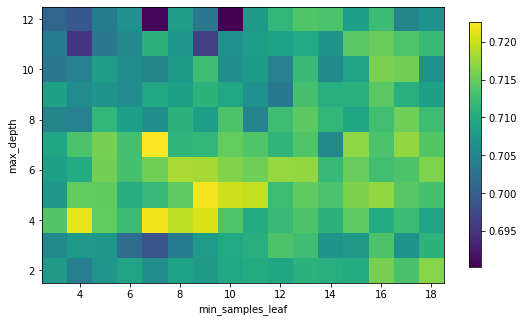

In [62]:
scores = clf.cv_results_['mean_test_score']

fig, ax = plt.subplots(figsize=(9, 7.5))
im = ax.imshow(scores.reshape((11, 16)),
               origin='lower',
               extent=[2.5, 18.5, 1.5, 12.5],
               interpolation='none',
               aspect=1,
               cmap='viridis'
              )
ax.set_ylabel('max_depth')
ax.set_xlabel('min_samples_leaf')
cb = plt.colorbar(im, shrink=0.6)

`clf` can now tell us the best parameters to use with our `RandomForestClassifier`

In [63]:
clf.best_params_

{'max_depth': 7, 'min_samples_leaf': 7}

In [64]:
clf.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=7,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=7, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, random_state=42,
                           subsample=1.0, tol=0.0001, validation_fraction=0.1,
                           verbose=0, warm_start=False)

The nice thing about `scikit-learn`'s methods is that they're all consistent and behave in the same way. Notice how`GridSearchCV` was `.fit()`. That means that we can use it to `.predict()` and it will automatically use the best set of parameters!

In [65]:
y_pred = clf.predict(X_val)
print(classification_report(y_val, y_pred, digits=3))

              precision    recall  f1-score   support

    dolomite      1.000     0.100     0.182        30
   limestone      0.542     0.481     0.510        81
    mudstone      0.657     0.742     0.697        31
   sandstone      0.095     0.040     0.056        50
   siltstone      0.698     0.881     0.779       160
  wackestone      0.548     0.689     0.611        74

    accuracy                          0.608       426
   macro avg      0.590     0.489     0.472       426
weighted avg      0.590     0.608     0.566       426



In [66]:
clf.score(X_train, y_train), clf.score(X_val, y_val)

(1.0, 0.607981220657277)

## Model application, and pipelines

Don't forget that you'll also need the scaler that goes with the model. The best idea is probably to make a pipeline which contains both the scaler and the classifier; then you only have one model to share.

Making pipelines is easy. We just have to provide (from the docs) **a list of (name, transform) tuples (implementing fit/transform) that are chained, in the order in which they are chained, with the last object an estimator.**

In [111]:
from sklearn.pipeline import Pipeline

model = Pipeline(steps=[('scaler', scaler),
                        ('classifier', clf),
                       ])

This is 'just' an `sklearn` model.

Now might be a good time to check our **test** set — the one we reserved at the start. How might our model do on this dataset?

In [112]:
y_pred = model.predict(X_test)  # X_test was unscaled.

f1_score(y_test, y_pred, average='weighted')

0.6300118530234229

We get a similar result to the validation set. That's good.

The pipeline is convenient whenever we have multiple steps in the prediction workflow, because it ensures we'll be consistent and makes it easier to save the model (below).

## Training the final model

Now that we have selected the model we want to use, we should retrain it on all of the data.

NB We could omit the scaling step for a random forest. But it doesn't do any harm...

In [113]:
scaler = StandardScaler().fit(X)

rf = RandomForestClassifier(random_state=42, **clf.best_params_).fit(X, y)

model = Pipeline(steps=[('scaler', scaler),
                        ('classifier', rf),
                       ])

## Model persistence

Often, we'd like to save the trained model, to go and apply it in some other application, or to share with someone else. The easiest way to save most models is as a Python 'pickle' object:

In [114]:
import joblib

joblib.dump(model, 'facies_pipeline.pkl')

['facies_pipeline.pkl']

## Model application

How do you load and use a saved model?

In [115]:
model = joblib.load('facies_pipeline.pkl')

In [116]:
model.named_steps

{'scaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'classifier': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=7, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=4, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=False, random_state=42, verbose=0,
                        warm_start=False)}

Now you can load some data:

    df = pd.read_csv('..some_new_data_you_have_collected.csv')
  
Then extract the relevant features and cast it as a 2D array:

    X_new = df[['GR','RHOB','PE','ILD_log10']].values

Now pass the matrix `X_new` into the classifier's predict method:

    y_pred = model.predict(X_new)

And you're done!

<hr />

<p style="color:gray">©2020 Agile Geoscience. Licensed CC-BY.</p>